#Auto PI after three convolution layers

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint
!pip install keras-preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/archive.zip'

# Specify the directory where you want to extract the files
extract_to_dir = '/content/29unzip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Print a message indicating the extraction directory
print(f"Files extracted to {extract_to_dir}")

Files extracted to /content/29unzip


In [ ]:
!pip install tensorflow keras numpy matplotlib

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
input_folder = '/content/29unzip/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
output_folder = '/content/29unzip/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
os.makedirs(output_folder, exist_ok=True)

target_total = 465
current_count = len(os.listdir(input_folder))
images_needed = target_total - current_count

image_files = os.listdir(input_folder)
generated = 0

while generated < images_needed:
    for img_file in image_files:
        img_path = os.path.join(input_folder, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate one augmented image per iteration
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder,
                                  save_prefix='aug', save_format='jpeg'):
            generated += 1
            if generated >= images_needed:
                break
    if generated >= images_needed:
        break

print(f"Generated {generated} augmented images.")

Generated 464 augmented images.


In [ ]:
#count number of images and classes Benign=0 maligant=1
ROOT_DIR="/content/29unzip/The IQ-OTHNCCD lung cancer dataset"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
       number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
       number_of_images.items()

In [ ]:
number_of_images.items()

dict_items([('Bengin cases', 574), ('Malignant cases', 561)])

In [ ]:
import os
import shutil
import random
import math

ROOT_DIR = '/content/29unzip/The IQ-OTHNCCD lung cancer dataset'  # replace with your dataset root
random.seed(42)  # for reproducibility

# Count the number of images in each class
number_of_images = {}
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    if os.path.isdir(dir_path):
        number_of_images[dir_name] = len(os.listdir(dir_path))

# Create train, validation, and test folders if not exist
for split in ['train111x', 'validation111x', 'test111x']:
    if not os.path.exists(split):
        os.mkdir(split)
        for class_name in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, class_name)
            if os.path.isdir(class_path):
                os.makedirs(os.path.join(split, class_name), exist_ok=True)

# Split the dataset
for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = os.listdir(class_path)
    random.shuffle(all_images)  # shuffle once

    total_images = len(all_images)
    train_size = int(0.8 * total_images)
    val_size = int(0.1 * total_images)
    test_size = total_images - train_size - val_size  # remainder to test

    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Move or copy files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('train111x', class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('validation111x', class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('test111x', class_name, img))

print("Dataset splitting completed successfully.")

Dataset splitting completed successfully.


In [ ]:
# Count the number of images in the validation folder
number_of_images_val = {}
for dir in os.listdir("./validation111x"):
    number_of_images_val[dir] = len(os.listdir(os.path.join("./validation111x", dir)))

number_of_images_val

{'Bengin cases': 57, 'Malignant cases': 56}

In [ ]:
# Count the number of images in the training folder
number_of_images_train = {}
for dir in os.listdir("./train111x"):
    number_of_images_train[dir] = len(os.listdir(os.path.join("./train111x", dir)))

number_of_images_train

{'Bengin cases': 459, 'Malignant cases': 448}

In [ ]:
# Count the number of images in the test folder
number_of_images_test = {}
for dir in os.listdir("./test111x"):
    number_of_images_test[dir] = len(os.listdir(os.path.join("./test111x", dir)))

number_of_images_test

{'Bengin cases': 58, 'Malignant cases': 57}

Found 907 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 599ms/step - accuracy: 0.8660 - loss: 0.5142 - val_accuracy: 0.4956 - val_loss: 0.7188 - learning_rate: 1.0000e-04
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 431ms/step - accuracy: 0.9004 - loss: 0.3608 - val_accuracy: 0.4956 - val_loss: 0.9105 - learning_rate: 1.0000e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 430ms/step - accuracy: 0.8980 - loss: 0.3269 - val_accuracy: 0.4956 - val_loss: 1.2964 - learning_rate: 1.0000e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 432ms/step - accuracy: 0.9006 - loss: 0.2973 - val_accuracy: 0.4956 - val_loss: 1.6619 - learning_rate: 1.0000e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 433ms/step - accuracy: 0.9002 - loss: 0.2834 - val_accuracy: 0.4956 - val_loss: 1.8376 - learning_rate: 1.0000e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.8899 - loss: 0.2866
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy:

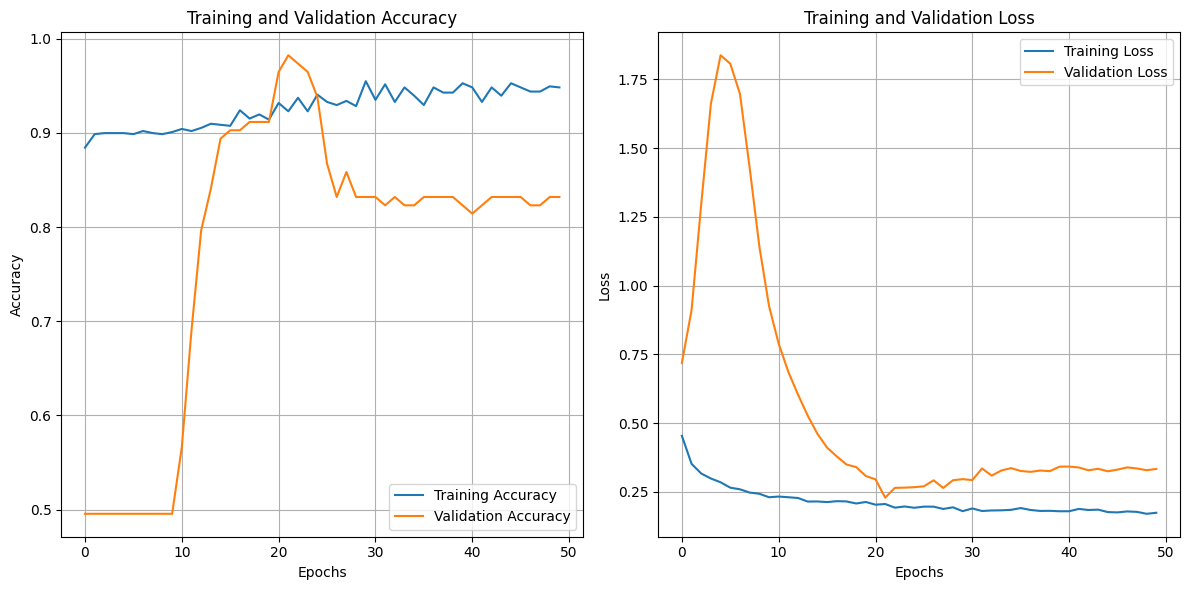

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as nps

# --- PI Layer ---
class PILayer(tf.keras.layers.Layer):
    def __init__(self, target_intensity=0.5, max_iter=1):
        super(PILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp',
                                  shape=(),
                                  initializer=tf.constant_initializer(0.5),
                                  trainable=True)
        self.Ki = self.add_weight(name='Ki',
                                  shape=(),
                                  initializer=tf.constant_initializer(0.1),
                                  trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer after all 3 conv blocks ---
class CNNWithPIConvOutput(tf.keras.Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.pi = PILayer()  # PI after 3 conv blocks

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        feat_before = x
        x = self.pi(x)
        feat_after = x

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        if return_features:
            return x, feat_before, feat_after
        return x

# --- Data paths and preprocessing ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# --- Model Training ---
model = CNNWithPIConvOutput() # Corrected typo here

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[lr_scheduler]
)

# --- Plot Training Curves ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

Found 907 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 520ms/step - accuracy: 0.8284 - loss: 0.4198 - val_accuracy: 0.4956 - val_loss: 0.9231
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 431ms/step - accuracy: 0.8951 - loss: 0.3002 - val_accuracy: 0.4956 - val_loss: 1.8681
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 437ms/step - accuracy: 0.8950 - loss: 0.2964 - val_accuracy: 0.4956 - val_loss: 2.5797
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy: 0.9028 - loss: 0.2519 - val_accuracy: 0.4956 - val_loss: 2.7090
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 444ms/step - accuracy: 0.9224 - loss: 0.2409 - val_accuracy: 0.4956 - val_loss: 2.0444
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 0.9328 - loss: 0.2335 - val_accuracy: 0.4956 - val_loss: 1.6086
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 429ms/step - accuracy: 0.9274 - loss: 0.2015 - val_accuracy: 0.4956 - val_loss: 1.6451
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 430ms/step - accuracy: 0.9059 - loss: 0.2399 - val_accu

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step
Confusion Matrix:
 [[50  8]
 [ 0 57]]


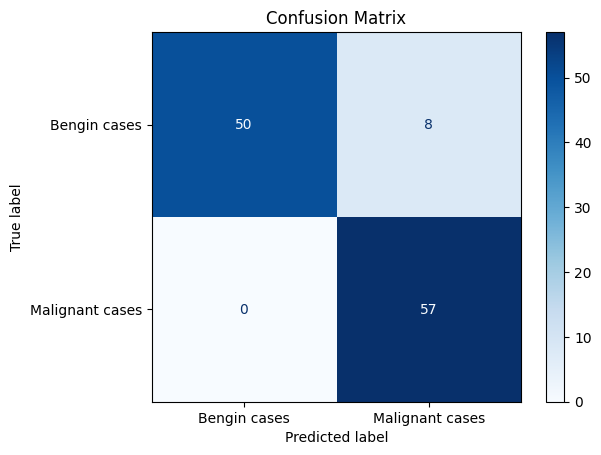

Accuracy:  0.9304
Precision: 0.8769
Recall:    1.0000
F1 Score:  0.9344
AUC-ROC:   0.9976


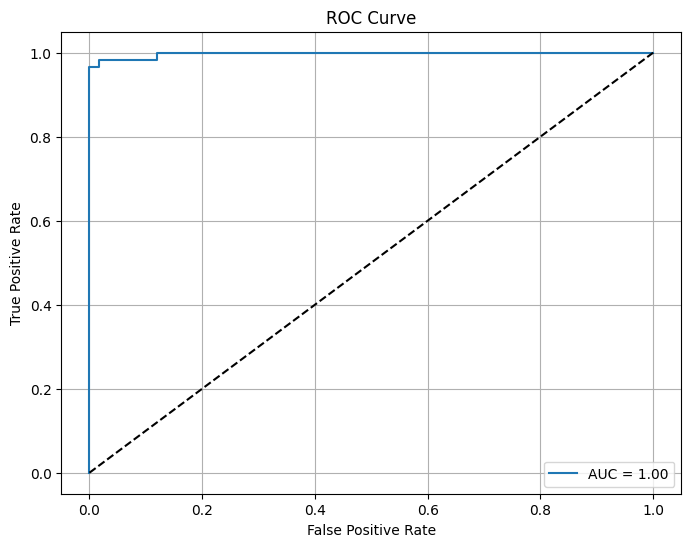

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# --- PI Layer ---
class PILayer(tf.keras.layers.Layer):
    def __init__(self, target_intensity=0.5, max_iter=1):
        super(PILayer, self).__init__()
        self.target_intensity = target_intensity
        self.max_iter = max_iter

    def build(self, input_shape):
        self.Kp = self.add_weight(name='Kp',
                                  shape=(),
                                  initializer=tf.constant_initializer(0.5),
                                  trainable=True)
        self.Ki = self.add_weight(name='Ki',
                                  shape=(),
                                  initializer=tf.constant_initializer(0.1),
                                  trainable=True)

    def call(self, inputs):
        x = tf.identity(inputs)
        integral_error = tf.constant(0.0, dtype=inputs.dtype)

        for _ in range(self.max_iter):
            current_mean = tf.reduce_mean(x)
            error = self.target_intensity - current_mean
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            x = x + adjustment
            x = tf.clip_by_value(x, 0.0, 1.0)

        return x

# --- CNN Model with PI Layer after all 3 conv blocks ---
class CNNWithPIConvOutput(tf.keras.Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.pi = PILayer()  # PI after 3 conv blocks

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        feat_before = x
        x = self.pi(x)
        feat_after = x

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        if return_features:
            return x, feat_before, feat_after
        return x
# --- Parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

# --- Data Preparation ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
test_dir = '/content/test111x'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# --- Model Instantiation and Compilation ---
model = CNNWithPIConvOutput()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# --- Train the Model (no callbacks) ---
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# --- Evaluate on Test Data ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Predictions ---
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype(int).ravel()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Metrics ---
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, zero_division=0)
recall = recall_score(true_classes, pred_classes, zero_division=0)
f1 = f1_score(true_classes, pred_classes, zero_division=0)
auc = roc_auc_score(true_classes, pred_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(true_classes, pred_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()